10680927 - Agbekuadzi Ceasar

**Analysis of Wine Quality**


*With regards to the wine industry, they would be glad if human quality of tasting would be nearly equal to the chemical properties of wine so that attestation and quality assessment and assurance process is more controlled.
Data are gathered on 12 distinct attributes of the wines. one attribute is quality which is based on sensitive data, and the remaining are on chemical properties of the wines including density, acidity, alcohol content etc. Chemical attributes of wines are continuous variables. Quality is an ordinal variable with a possible ranking from 1 (bad) to 10 (good).*


**Objective Of Analysis**

In this project, I develop a model that can explore a wine’s chemical properties to predict its quality. The wine quality dataset I’ll be using for this project consists of approximately 4898 observations, including 11 independent variables and one dependent variable 
The following models is taken to predict the quality of the wine:
*Random Forest 
*Stochastic Gradient Descent
*Support Vector Classifier
*Linear Regression
*Logistic Regression
*KNeighbor Classifier
*Naive Bayes

**Data Exploration**

In [75]:
#import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
wineData = pd.read_csv('../winequality.csv')

wineData.head(5)

FileNotFoundError: [Errno 2] File b'../winequality.csv' does not exist: b'../winequality.csv'

In [50]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All eleven(11) attributes are of the float type and the target attribute is an integer type

In [51]:
#check for duplicate
wineData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values

In [52]:
wineData.duplicated().sum()

240

240 data rows are duplicated. Therefore we would have to remove them to prevent redundancy in our data.

In [53]:
#We keep first instance it occurs and drop the others
wineData.drop_duplicates(keep = 'first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5


We now have 1359 rows to deal with

**Data Visualization**

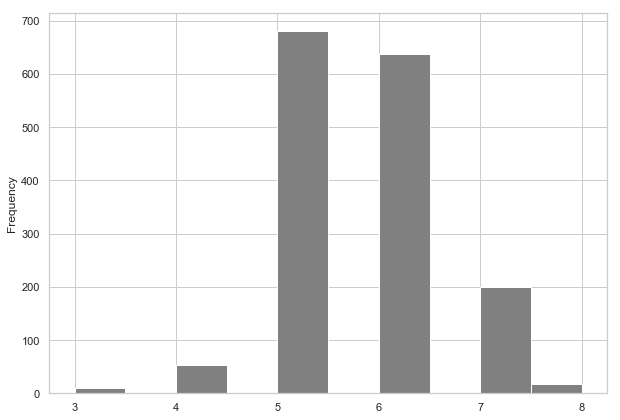

In [54]:
#checking frequency of the quality
wineData['quality'].plot(kind='hist', figsize=(10, 7), color='grey');

From the visualization, most voted between 5 and 6 

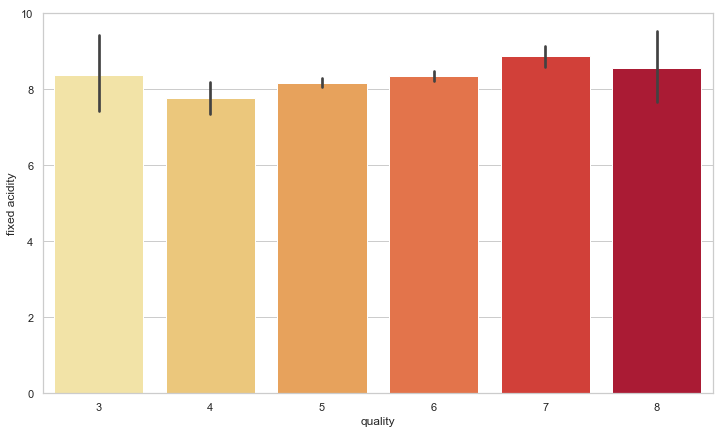

In [55]:
# The relationship between fixed acidity and quality
fig = plt.figure(figsize = (12,7))
sns.set(style="whitegrid")
sns.barplot(x = 'quality', y = 'fixed acidity', palette='YlOrRd', data = wineData, )

Here we see that fixed acidity does not give any specification to classify the quality.

**Data Preprocessing**

In [56]:
#We deduce a binary classificaion for the response variable.
#We split the quality of wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wineData['quality'] = pd.cut(wineData['quality'], bins = bins, labels = group_names)
wineData.quality.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [57]:
#Now lets assign a labels to our quality variable#
#Bad becomes 0 and good becomes 1

from sklearn import preprocessing
label_quality = preprocessing.LabelEncoder()
 
wineData['quality'] = label_quality.fit_transform(wineData['quality'])

In [58]:
#Let us count the good and bad wine
wineData['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We see that we have 1382 bad wines and 217 good wines

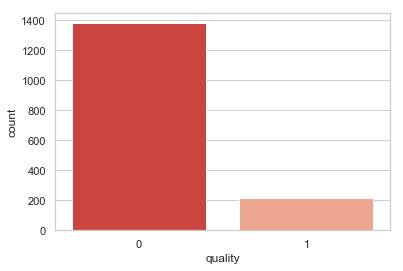

In [59]:
sns.countplot(wineData['quality'], palette='Reds_r')

**Data Preparation**

In [60]:
#Now seperate the dataset as response variable and feature variabes
X = wineData.drop('quality', axis = 1)
y = wineData['quality']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Let us apply Standard Scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Model Preparation**

In [61]:
#Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


#Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [62]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 29  18]]


In [63]:
#Stochastic Gradient Descent 

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       273
           1       0.46      0.57      0.51        47

    accuracy                           0.84       320
   macro avg       0.69      0.73      0.71       320
weighted avg       0.85      0.84      0.84       320



In [64]:
print(confusion_matrix(y_test, pred_sgd))

[[241  32]
 [ 20  27]]


In [65]:
#Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [66]:
#Prediction with Linear Regression 
 

lm = LinearRegression()
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)

print('R Squared Mean: ', lm.score(X_train, y_train))

R Squared Mean:  0.23608557272661426


In [67]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_lm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_lm))
print('R Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_lm)))

Mean Absolute Error: 0.2095757742020709
Mean Squared Error: 0.09250718723875365
R Mean Squared Error: 0.30414994203312556


In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)

print('R Squared Mean: ', lg.score(X_train, y_train))


R Squared Mean:  0.8858483189992181


**Comparing Models**

In [69]:
# prepare models

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score


print('Comparatively:             Mean Accuracy (Standard Deviation Accuracy)')
models = []
models.append(('Random Forest:                 ', RandomForestClassifier()))
models.append(('Stochastic GD:                 ', SGDClassifier()))
models.append(('Support VC:                    ', SVC()))
models.append(('Linear Regression:             ', LinearDiscriminantAnalysis()))
models.append(('Logistic Regression:           ', LogisticRegression()))
models.append(('KNeighbor Classifier:          ', KNeighborsClassifier()))
models.append(('Naive Baiyes:                  ', GaussianNB()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Comparatively:             Mean Accuracy (Standard Deviation Accuracy)
Random Forest:                 : 0.906982 (0.030097)
Stochastic GD:                 : 0.854595 (0.036272)
Support VC:                    : 0.889782 (0.023210)
Linear Regression:             : 0.883501 (0.022769)
Logistic Regression:           : 0.883526 (0.031077)
KNeighbor Classifier:          : 0.873364 (0.021081)
Naive Baiyes:                  : 0.836559 (0.022781)


Let me compare the models and thier accuaracy

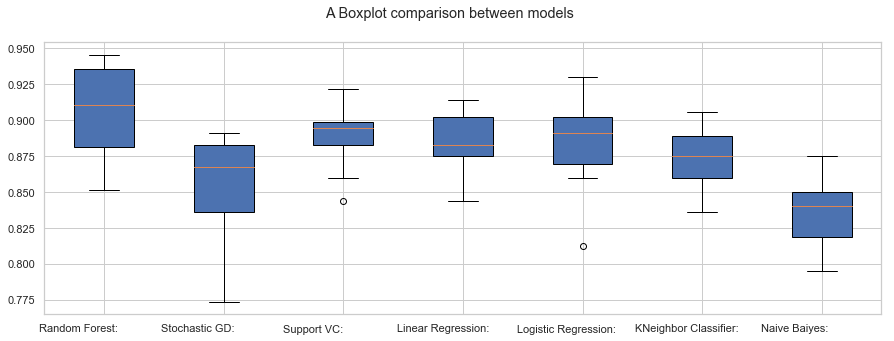

In [70]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('A Boxplot comparison between models')
ax = fig.add_subplot(111)
plt.boxplot(results,  patch_artist=True)
ax.set_xticklabels(names)
plt.show()

In [71]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   28.2s


Best Score:  0.8708753869653524
Best Params:  {'loss': 'log', 'alpha': 0.1, 'eta0': 1, 'learning_rate': 'invscaling', 'penalty': 'l2', 'class_weight': {0: 0.4, 1: 0.6}}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   41.8s finished


We increased the cross validation to 0.873. That is a positive result

In [72]:
# XGBoost default values
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying K-Fold_Cross_Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('XGBoost Accuracy Mean: ', accuracies.mean()) 
print('XGBoost Standard Deviation: ', accuracies.std())


XGBoost Accuracy Mean:  0.9077571358267716
XGBoost Standard Deviation:  0.021987388382806065


In [73]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.70      0.49      0.57        47

    accuracy                           0.89       320
   macro avg       0.81      0.73      0.76       320
weighted avg       0.88      0.89      0.89       320



In [74]:
# Using GridSearch to improve model
from sklearn.model_selection import GridSearchCV

parameter = {'max_depth' : [2, 3, 4, 5, 6]}
model = XGBClassifier(learning_rate = 0.05, gamma = 0, max_depth = 4, n_estimators = 100,min_child_weight= 3, random_state = 42)
grid = GridSearchCV(estimator= model, param_grid= parameter,verbose = 10)
grid.fit(X_train, y_train)

print('Grid SearchCV accuracy: ', grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.863, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.898, total=   0.1s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.867, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.898, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.918, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.867, total=   0.1s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s


[CV] ......................... max_depth=3, score=0.906, total=   0.1s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.863, total=   0.1s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.910, total=   0.1s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.902, total=   0.1s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.871, total=   0.1s
[CV] max_depth=4 .....................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV] ......................... max_depth=4, score=0.898, total=   0.2s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.875, total=   0.2s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.914, total=   0.1s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.906, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.859, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.906, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.875, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.7s finished


GridSearchCV has an accuracy of 0.90